### Feature Importances with Forests of Trees

- Learn from Aj. Prasert's Github
- Use dataset drom kaggle - source: https://www.kaggle.com/uciml/pima-indians-diabetes-database

In [1]:
# import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

Data Dictionary

- Pregnancies: Number of times pregnant
- Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- BloodPressure: Diastolic blood pressure (mm Hg)
- SkinThickness: Triceps skin fold thickness (mm)
- Insulin: 2-Hour serum insulin (mu U/ml)
- BMI: Body mass index (weight in kg/(height in m)^2)
- DiabetesPedigreeFunction: Diabetes pedigree function
- Age: Age (years)
- Outcome: Class variable (0 or 1) 268 of 768 are 1, the others are 0

In [3]:
# read data to dataframe

url = 'https://github.com/prasertcbs/basic-dataset/raw/master/diabetes.csv' # Aj.Prasert's github
df = pd.read_csv(url)
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [4]:
df.tail()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0

In [5]:
df.shape

(768, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


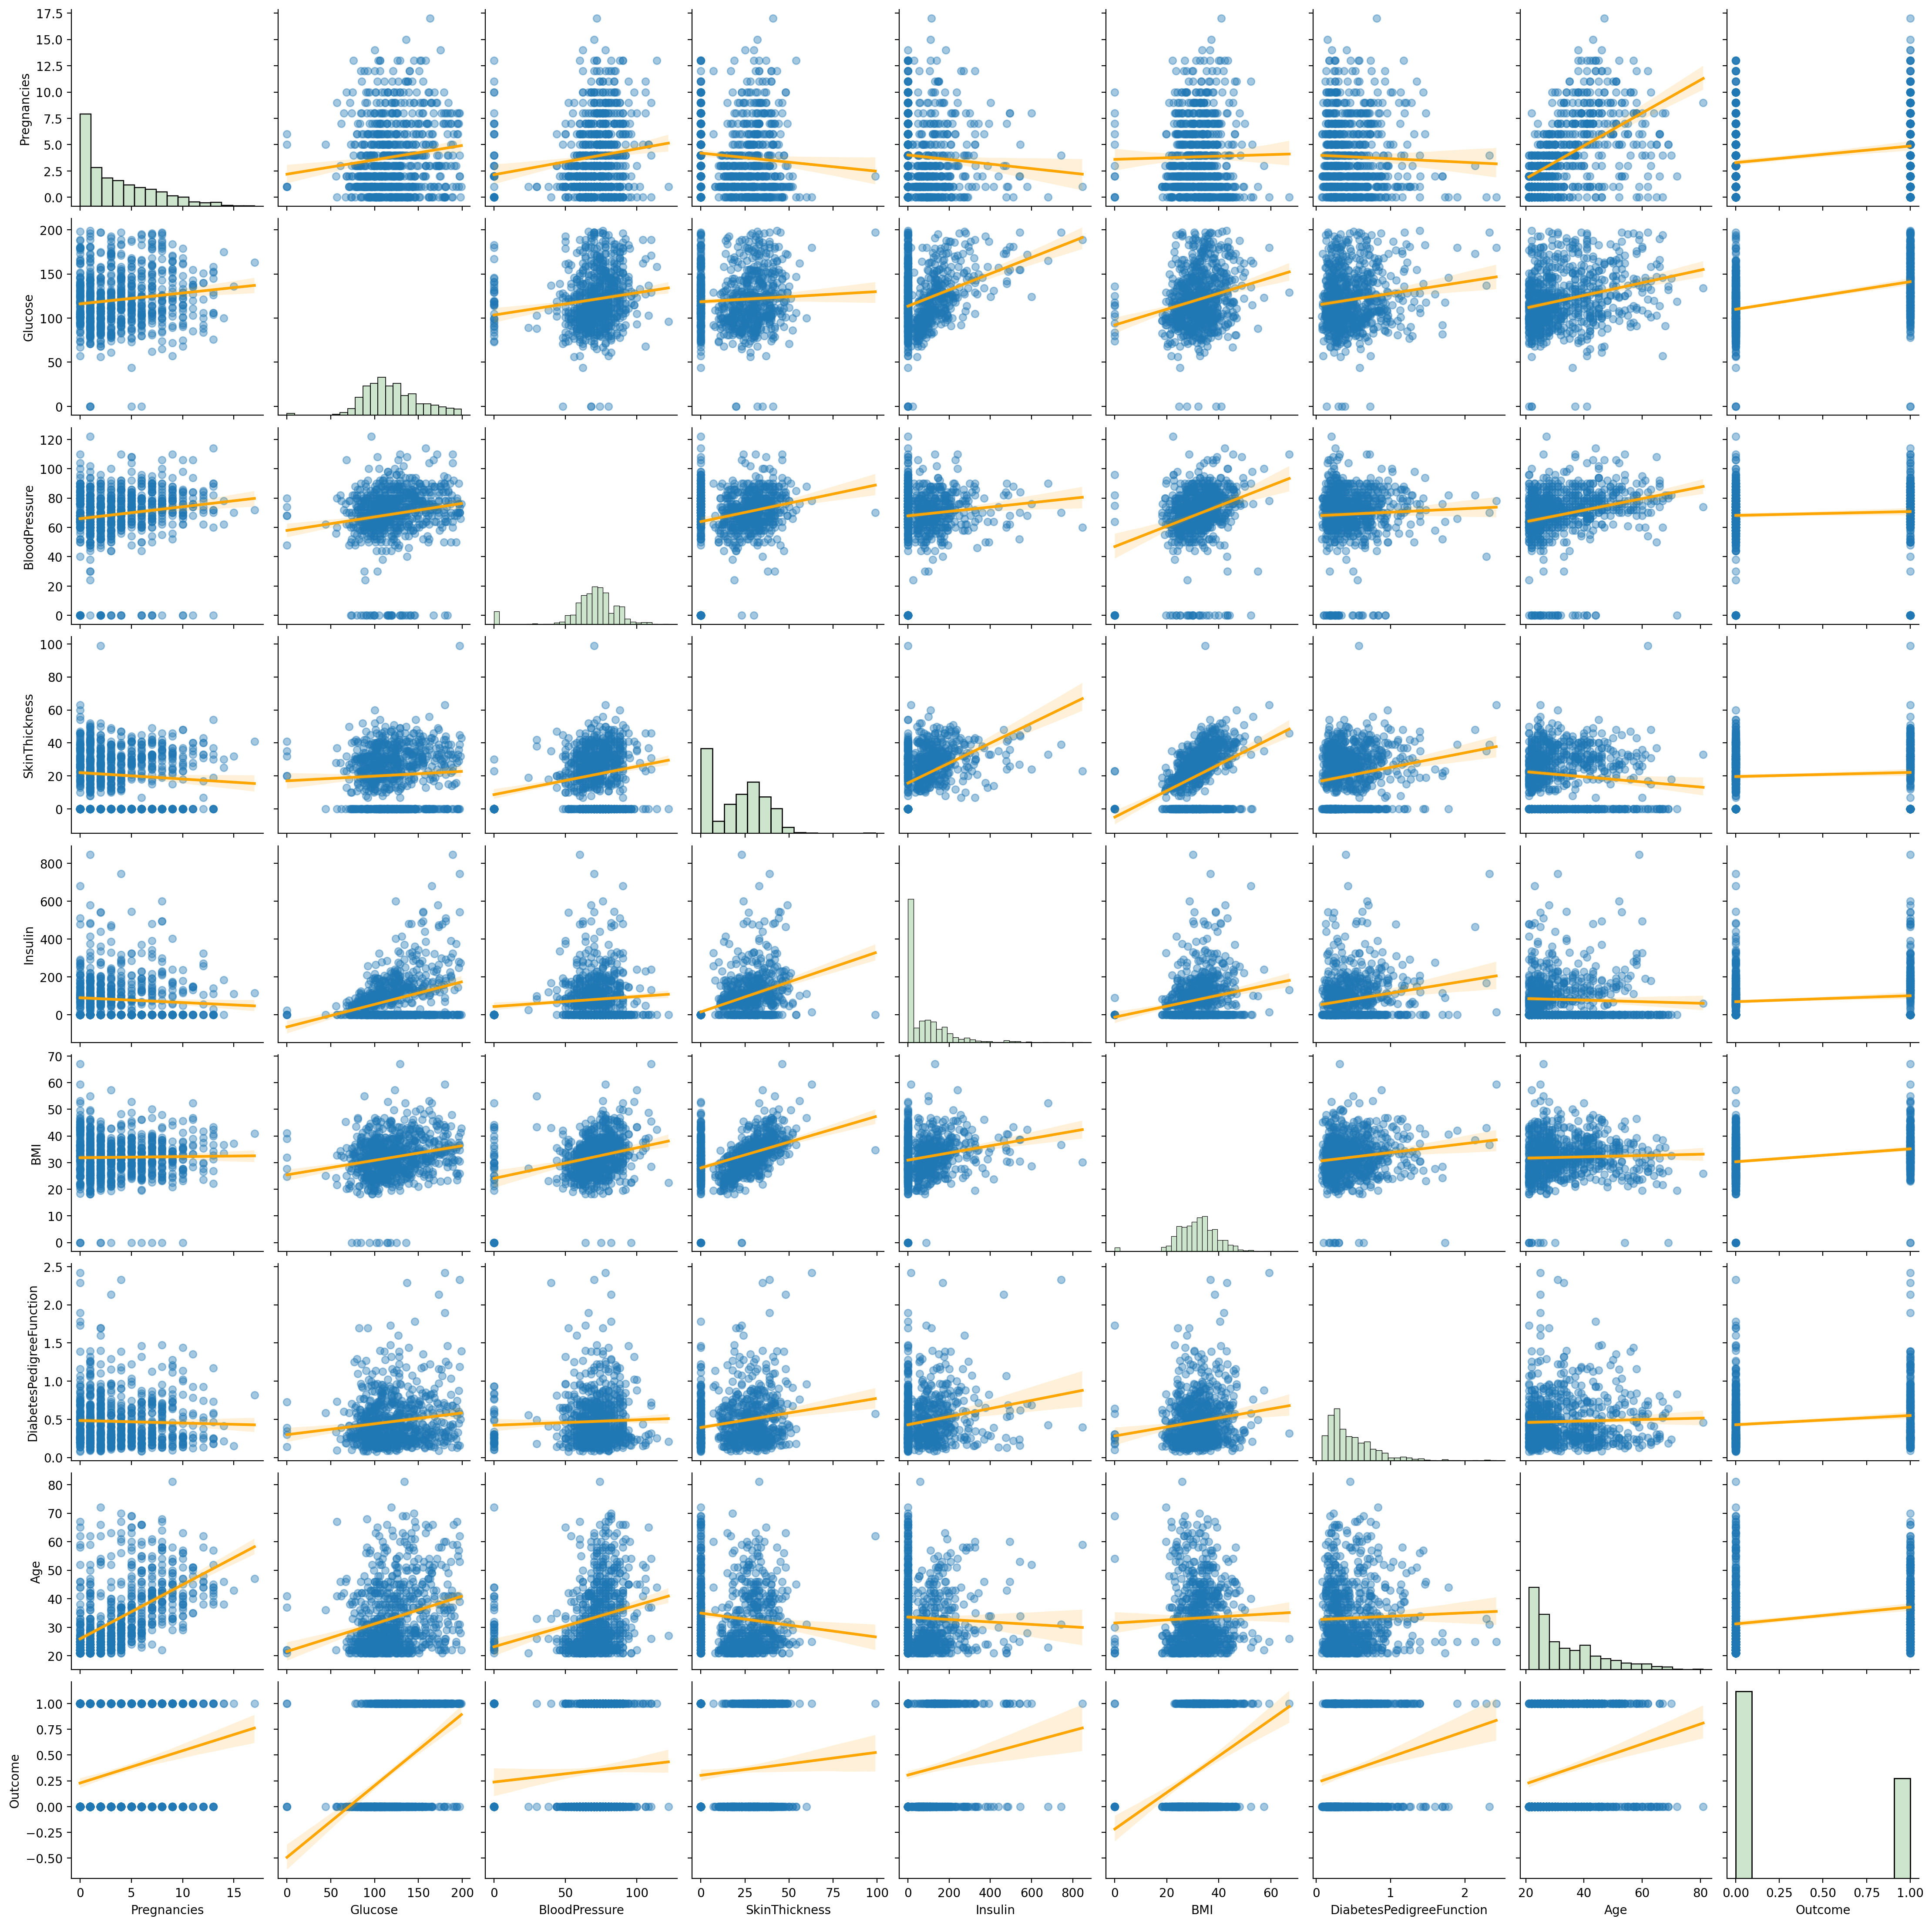

In [7]:
sns.pairplot(df, kind = 'reg', plot_kws = {'scatter_kws': {'alpha': 0.4}, 'line_kws': {'color': 'orange'}}, diag_kws = {'color': 'green', 'alpha':.2});

### scikit-learn

- sklearn: Classifier

In [8]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn import metrics

In [9]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [10]:
len(df)

768

In [11]:
len(df.columns)

9

In [12]:
# get X and y data

X = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
y = df['Outcome']

In [13]:
X.head(3)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32

In [14]:
y.head(3)

0    1
1    0
2    1
Name: Outcome, dtype: int64

In [15]:
# create model

# model= DecisionTreeClassifier(random_state=7)
model= RandomForestClassifier(n_estimators=250, random_state=7)
# model= ExtraTreesClassifier(n_estimators=250, random_state=7)

In [16]:
# fit/train a model

model.fit(X, y)
model

RandomForestClassifier(n_estimators=250, random_state=7)

In [17]:
model.feature_importances_

array([0.084649  , 0.25538214, 0.08686371, 0.06915221, 0.07227062,
       0.16934724, 0.12464596, 0.13768912])

In [18]:
fs = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=True)
fs

SkinThickness               0.069152
Insulin                     0.072271
Pregnancies                 0.084649
BloodPressure               0.086864
DiabetesPedigreeFunction    0.124646
Age                         0.137689
BMI                         0.169347
Glucose                     0.255382
dtype: float64

In [19]:
fs.sum()

1.0

<AxesSubplot: >

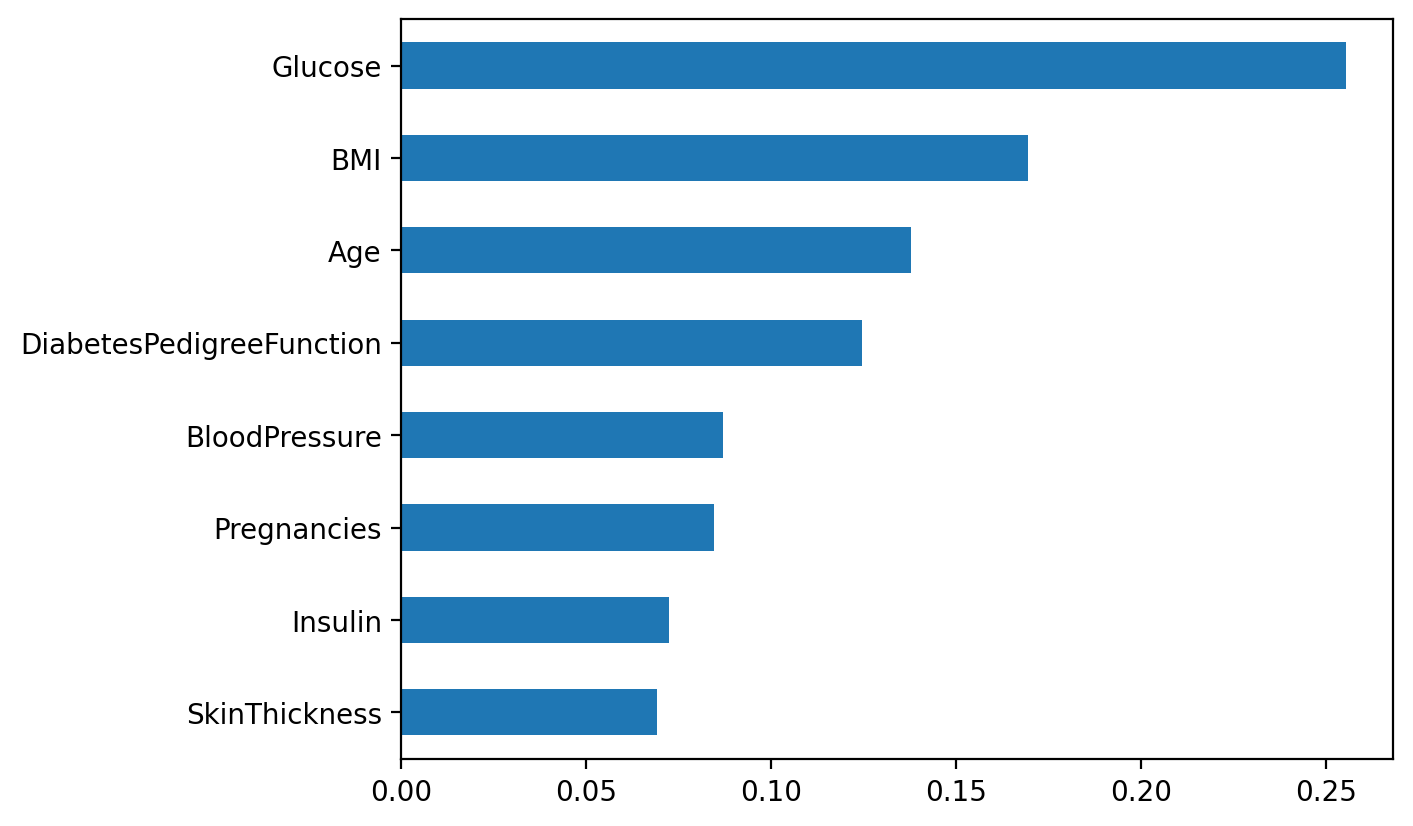

In [20]:
fs.plot(kind = 'barh')

In [21]:
fs[fs > .1]

DiabetesPedigreeFunction    0.124646
Age                         0.137689
BMI                         0.169347
Glucose                     0.255382
dtype: float64

In [22]:
fs.nlargest(4) # get .index

Glucose                     0.255382
BMI                         0.169347
Age                         0.137689
DiabetesPedigreeFunction    0.124646
dtype: float64

In [23]:
fs[fs > .1].index

Index(['DiabetesPedigreeFunction', 'Age', 'BMI', 'Glucose'], dtype='object')

In [24]:
X = df[fs[fs > .1].index]
X.head()

DiabetesPedigreeFunction  Age   BMI  Glucose
0                     0.627   50  33.6      148
1                     0.351   31  26.6       85
2                     0.672   32  23.3      183
3                     0.167   21  28.1       89
4                     2.288   33  43.1      137

In [25]:
X = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
# X=df[['Glucose', 'BMI', 'Age', 'DiabetesPedigreeFunction']]
# X=df[fs[fs > .1].index]
y = df['Outcome']

In [26]:
# split dat - use stratify to split train/test

test_size=.3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size,  stratify = y, random_state = 7)
X_train.shape, X_test.shape, y_train.shape, y_test.shape 

((537, 8), (231, 8), (537,), (231,))

### Confusion Matrix

In [28]:
algo = [
    [KNeighborsClassifier(n_neighbors=5), 'KNeighborsClassifier'], 
    [LogisticRegression(solver='lbfgs'), 'LogisticRegression'], 
    [Perceptron(), 'Perceptron'],
    [DecisionTreeClassifier(min_samples_split=10), 'DecisionTreeClassifier'],
    [GradientBoostingClassifier(), 'GradientBoostingClassifier'],
    [RandomForestClassifier(), 'RandomForestClassifier'],
    [BaggingClassifier(), 'BaggingClassifier'],
    [AdaBoostClassifier(), 'AdaBoostClassifier'],
    [GaussianNB(), 'GaussianNB'],
    [MLPClassifier(), 'MLPClassifier'],
    [SVC(kernel='linear'), 'SVC_linear'], 
    [GaussianProcessClassifier(), 'GaussianProcessClassifier']
]

model_scores = []
for a in algo:
    model = a[0]
    model.fit(X_train, y_train)
    score=model.score(X_test, y_test)
    model_scores.append([score, a[1]])
    y_pred=model.predict(X_test)
    print(f'{a[1]:20} score: {score:.04f}')
    print(metrics.confusion_matrix(y_test, y_pred))
    print(metrics.classification_report(y_test, y_pred))
    print('-' * 100)

print(model_scores)
print(f'best score = {max(model_scores)}')

KNeighborsClassifier score: 0.7316
[[128  22]
 [ 40  41]]
              precision    recall  f1-score   support

           0       0.76      0.85      0.81       150
           1       0.65      0.51      0.57        81

    accuracy                           0.73       231
   macro avg       0.71      0.68      0.69       231
weighted avg       0.72      0.73      0.72       231

----------------------------------------------------------------------------------------------------
LogisticRegression   score: 0.7316
[[133  17]
 [ 45  36]]
              precision    recall  f1-score   support

           0       0.75      0.89      0.81       150
           1       0.68      0.44      0.54        81

    accuracy                           0.73       231
   macro avg       0.71      0.67      0.67       231
weighted avg       0.72      0.73      0.72       231

----------------------------------------------------------------------------------------------------
Perceptron           score: 

/opt/homebrew/Caskroom/miniforge/base/envs/conda_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/homebrew/Caskroom/miniforge/base/envs/conda_env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/Caskroom/miniforge/base/envs/conda_env/lib/python3.9/site-packages/sklearn/metric

BaggingClassifier    score: 0.7186
[[132  18]
 [ 47  34]]
              precision    recall  f1-score   support

           0       0.74      0.88      0.80       150
           1       0.65      0.42      0.51        81

    accuracy                           0.72       231
   macro avg       0.70      0.65      0.66       231
weighted avg       0.71      0.72      0.70       231

----------------------------------------------------------------------------------------------------
AdaBoostClassifier   score: 0.7489
[[128  22]
 [ 36  45]]
              precision    recall  f1-score   support

           0       0.78      0.85      0.82       150
           1       0.67      0.56      0.61        81

    accuracy                           0.75       231
   macro avg       0.73      0.70      0.71       231
weighted avg       0.74      0.75      0.74       231

----------------------------------------------------------------------------------------------------
GaussianNB           score: 

In [29]:
model_scores

[[0.7316017316017316, 'KNeighborsClassifier'],
 [0.7316017316017316, 'LogisticRegression'],
 [0.6493506493506493, 'Perceptron'],
 [0.7229437229437229, 'DecisionTreeClassifier'],
 [0.7575757575757576, 'GradientBoostingClassifier'],
 [0.7575757575757576, 'RandomForestClassifier'],
 [0.7186147186147186, 'BaggingClassifier'],
 [0.7489177489177489, 'AdaBoostClassifier'],
 [0.7619047619047619, 'GaussianNB'],
 [0.6536796536796536, 'MLPClassifier'],
 [0.7532467532467533, 'SVC_linear'],
 [0.6883116883116883, 'GaussianProcessClassifier']]

In [30]:
dscore = pd.DataFrame(model_scores, columns=['score', 'classifier'])
dscore

score                  classifier
0   0.731602        KNeighborsClassifier
1   0.731602          LogisticRegression
2   0.649351                  Perceptron
3   0.722944      DecisionTreeClassifier
4   0.757576  GradientBoostingClassifier
5   0.757576      RandomForestClassifier
6   0.718615           BaggingClassifier
7   0.748918          AdaBoostClassifier
8   0.761905                  GaussianNB
9   0.653680               MLPClassifier
10  0.753247                  SVC_linear
11  0.688312   GaussianProcessClassifier

In [31]:
dscore.sort_values('score', ascending=False)

score                  classifier
8   0.761905                  GaussianNB
4   0.757576  GradientBoostingClassifier
5   0.757576      RandomForestClassifier
10  0.753247                  SVC_linear
7   0.748918          AdaBoostClassifier
0   0.731602        KNeighborsClassifier
1   0.731602          LogisticRegression
3   0.722944      DecisionTreeClassifier
6   0.718615           BaggingClassifier
11  0.688312   GaussianProcessClassifier
9   0.653680               MLPClassifier
2   0.649351                  Perceptron